In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [83]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [84]:
# test Null in the dataset
null_counts = df.isnull().sum()
print(null_counts)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Based on data description from Kaggle: \
Pregnancies: To express the Number of pregnancies,
Glucose: To express the Glucose level in blood,
BloodPressure: To express the Blood pressure measurement,
SkinThickness: To express the thickness of the skin,
Insulin: To express the Insulin level in blood,
BMI: To express the Body mass index,
DiabetesPedigreeFunction: To express the Diabetes percentage,
Age: To express the age,
Outcome: To express the final result 1 is Yes and 0 is No.

It is impossible to be zero Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age. So I start with checking 0 in the dataset.

In [85]:
df.info()
for column in df:
    zero_count = (df[column] == 0).sum()
    print(f"Number of {column}: {zero_count}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Number of Pregnancies: 111
Number of Glucose: 5
Number of BloodPressure: 35
Number of SkinThickness: 227
Number of Insulin: 374
Number of BMI: 11
Number of DiabetesPedigreeFunction: 0
Number of Age: 0
Number of Outcome: 500


In [86]:
ST_mean = df["Glucose"].mean()
print(f"Mean Glucose: {ST_mean:.2f}")

zero_count = (df["Glucose"] == 0).sum()
print(f"Number of zero values before replacement: {zero_count}")

df["Glucose"] = df["Glucose"].replace(0, ST_mean)

zero_count_after = (df["Glucose"] == 0).sum()
print(f"Number of zero values after replacement: {zero_count_after}")

print(df["Glucose"].describe())

Mean Glucose: 120.89
Number of zero values before replacement: 5
Number of zero values after replacement: 0
count    768.000000
mean     121.681605
std       30.436016
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64


In [87]:
ST_mean = df["BloodPressure"].mean()
print(f"Mean BloodPressure: {ST_mean:.2f}")

zero_count = (df["BloodPressure"] == 0).sum()
print(f"Number of zero values before replacement: {zero_count}")

df["BloodPressure"] = df["BloodPressure"].replace(0, ST_mean)

zero_count_after = (df["BloodPressure"] == 0).sum()
print(f"Number of zero values after replacement: {zero_count_after}")

print(df["BloodPressure"].describe())

Mean BloodPressure: 69.11
Number of zero values before replacement: 35
Number of zero values after replacement: 0
count    768.000000
mean      72.254807
std       12.115932
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


In [88]:
ST_mean = df["SkinThickness"].mean()
print(f"Mean SkinThickness: {ST_mean:.2f}")

zero_count = (df["SkinThickness"] == 0).sum()
print(f"Number of zero values before replacement: {zero_count}")

df["SkinThickness"] = df["SkinThickness"].replace(0, ST_mean)

zero_count_after = (df["SkinThickness"] == 0).sum()
print(f"Number of zero values after replacement: {zero_count_after}")

print(df["SkinThickness"].describe())

Mean SkinThickness: 20.54
Number of zero values before replacement: 227
Number of zero values after replacement: 0
count    768.000000
mean      26.606479
std        9.631241
min        7.000000
25%       20.536458
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64


In [89]:
ST_mean = df["Insulin"].mean()
print(f"Mean Insulin: {ST_mean:.2f}")

zero_count = (df["Insulin"] == 0).sum()
print(f"Number of zero values before replacement: {zero_count}")

df["Insulin"] = df["Insulin"].replace(0, ST_mean)

zero_count_after = (df["Insulin"] == 0).sum()
print(f"Number of zero values after replacement: {zero_count_after}")

print(df["Insulin"].describe())

Mean Insulin: 79.80
Number of zero values before replacement: 374
Number of zero values after replacement: 0
count    768.000000
mean     118.660163
std       93.080358
min       14.000000
25%       79.799479
50%       79.799479
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64


In [90]:
ST_mean = df["BMI"].mean()
print(f"Mean BMI: {ST_mean:.2f}")

zero_count = (df["BMI"] == 0).sum()
print(f"Number of zero values before replacement: {zero_count}")

df["BMI"] = df["BMI"].replace(0, ST_mean)

zero_count_after = (df["BMI"] == 0).sum()
print(f"Number of zero values after replacement: {zero_count_after}")

print(df["BMI"].describe())

Mean BMI: 31.99
Number of zero values before replacement: 11
Number of zero values after replacement: 0
count    768.000000
mean      32.450805
std        6.875374
min       18.200000
25%       27.500000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64


In [91]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [92]:
# separate dependent and independent
X = df.iloc[:,0:8].values  # independent include Pregnancies,Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
y = df.iloc[:,8].values  # dependent Outcome
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [93]:
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(X,y)

RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [94]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictioins = regressor.predict(X)

mse = mean_squared_error(y, predictioins)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictioins)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.05395415214178545
Mean Squared Error: 0.029296875
R-squared: 0.871044776119403


In [95]:
# import numpy as np
# X_grid = np.arange(min(X), max(X), 0.01)
# X_grid = X_grid.reshape(len(X_grid), 1)

# plt.scatter(X,y, color='blue')
# plt.plot(X_grid, regressor.predict(X_grid),color='green') 
  
# plt.title("Random Forest Regression Results")
# plt.xlabel('factor related to diabetes')
# plt.ylabel('Outcome')
# plt.show()

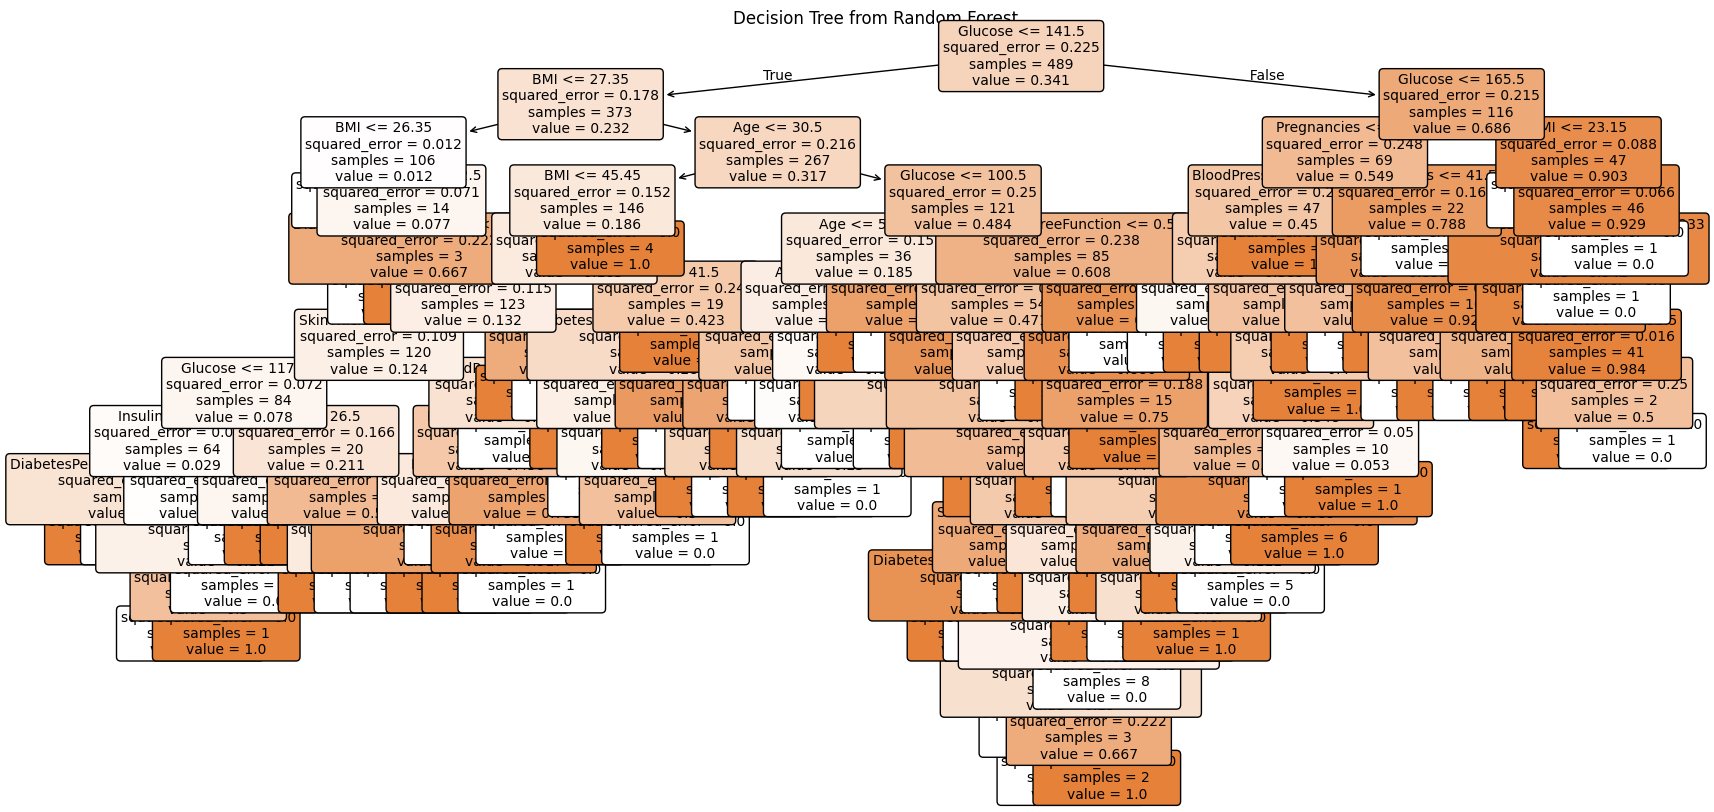

In [96]:
from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [97]:
prediction = regressor.predict([[1, 80, 80, 22, 10, 27.8, 0.442, 26]])
print(prediction)

[0.1]
